In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, insert
import sqlalchemy as sal

%matplotlib inline

### Import from Database 

In [30]:
# establish connection to the database
engine = sal.create_engine('sqlite:///winewebscraping.db')
# storing tables from database into dataframe
master = pd.read_sql('SELECT * FROM master', engine)
ratings = pd.read_sql('SELECT * FROM ratings', engine)
varietals = pd.read_sql('SELECT * FROM varietals', engine)
prices = pd.read_sql('SELECT * FROM prices', engine)
california = pd.read_sql('SELECT * FROM california', engine)

In [4]:
prices.head()

,product_name,price,varietal,rating,rating_count,appellation,region,year,z_score
0,Dom Perignon Vintage with Gift Box,199,Vintage Sparkling Wine,4.5,42.0,['Champagne'],France,2010,0.056459
1,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,4.3,62.0,['Napa Valley'],California,2017,0.270915
2,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,4.6,108.0,['Napa Valley'],California,2016,0.090134
3,Quintessa,199,Cabernet Sauvignon,4.7,73.0,[' Napa Valley'],California,2016,0.056459
4,Joseph Phelps Insignia,300,Bordeaux Red Blends,4.6,81.0,['Napa Valley'],California,2016,0.122551


In [5]:
master.dtypes

product_name     object
price             int64
varietal         object
rating          float64
rating_count      int64
appellation      object
region           object
year              int64
dtype: object

In [6]:
#set the base color for the charts
green = sb.color_palette("hls", 8)[3]
purple = sb.color_palette("hls", 8)[6]
yellow = sb.color_palette("hls", 8)[1]

### Feature Engineering

In [7]:
master['ratings_cat'] = pd.cut(x = master['price'], bins = [ 0, 1, 2, 3, 4, 5], labels = ['bad','mediocre', 'average','good','excellent'], right=False) 

In [8]:
master['price_cat'] = pd.cut(x = master['price'], bins = [ 0, 100, 250, 500, 1000, 18000], labels = ['$0-$99','$100-$249', '$250-$499','$500-$999','$1000+'], right=False) 

In [9]:
varietals['ratings_cat'] = pd.cut(x = master['price'], bins = [ 0, 1, 2, 3, 4, 5], labels = ['bad','mediocre', 'average','good','excellent'], right=False) 

### Price exploration 

Where are the most expensive wines from? Conversely the cheapest wines?

In [10]:
low = master['price'].min()
high = master['price'].max()
# print('The cheapest wine was priced at {}, and the most expensive wine was priced at {}').format(low, high)

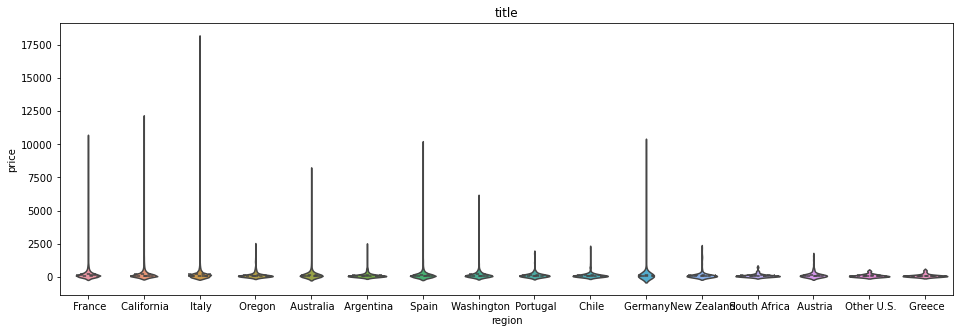

In [11]:
# Violin Plot
plt.figure(figsize = [16, 5])
plt.title('title');
sb.set_palette('husl', 9)
sb.violinplot(data=master, x='region', y='price', inner = 'quartile');

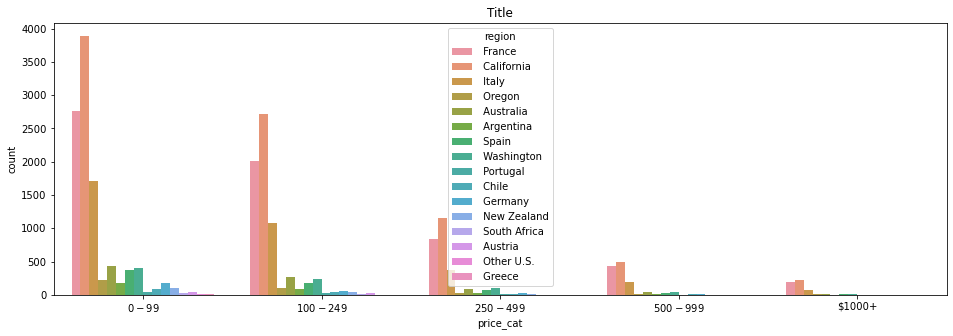

In [12]:
plt.figure(figsize = [16, 5])
plt.title('Title');
sb.set_palette('husl', 9)
sb.countplot(data=master, x='price_cat', hue='region');

How does year affect the price of the wine?

In [13]:
years = master[master['year'] > 1950]
years = years[years['year'] < 2020]

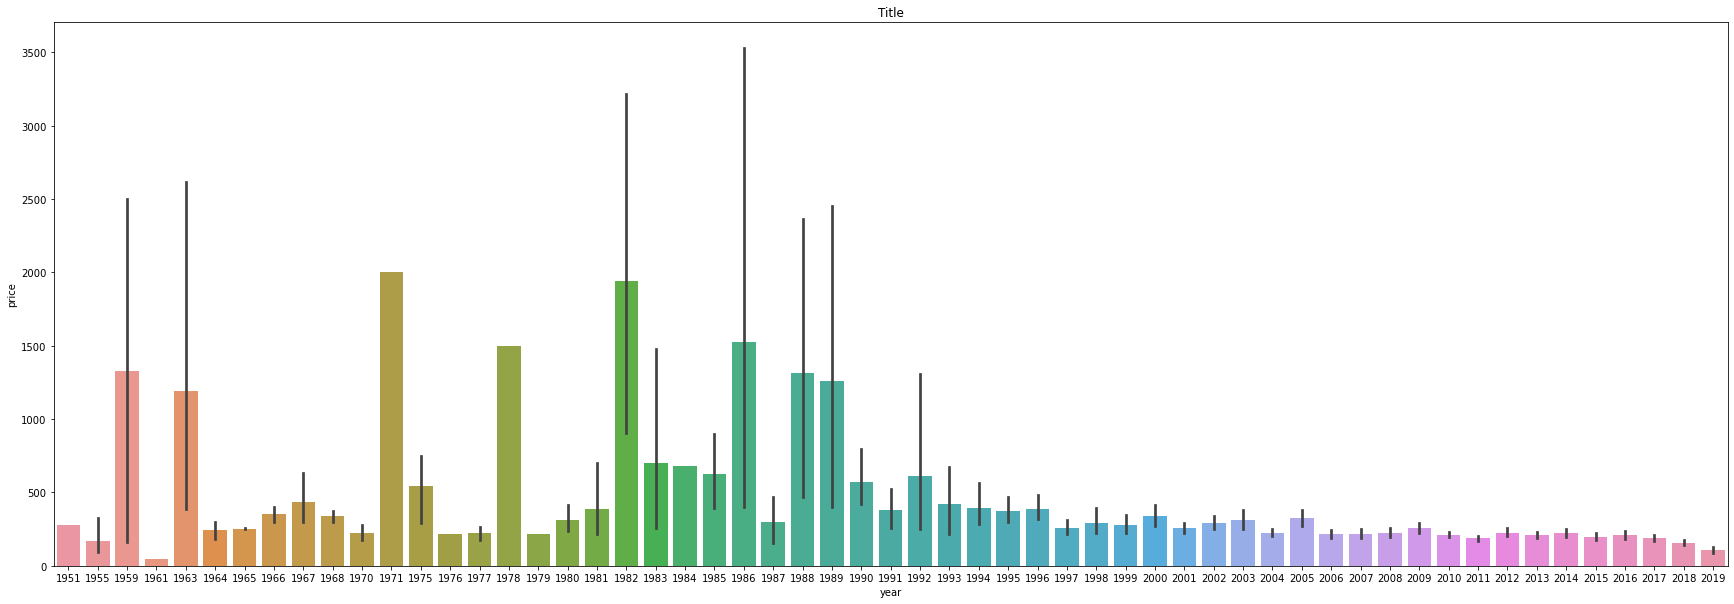

In [14]:
plt.figure(figsize = [30, 10])
plt.title('Title');
sb.set_palette('husl', 9)
sb.barplot(data=years, x="year", y="price");

### Region Exploration 

What are the top producing regions for the dataset?

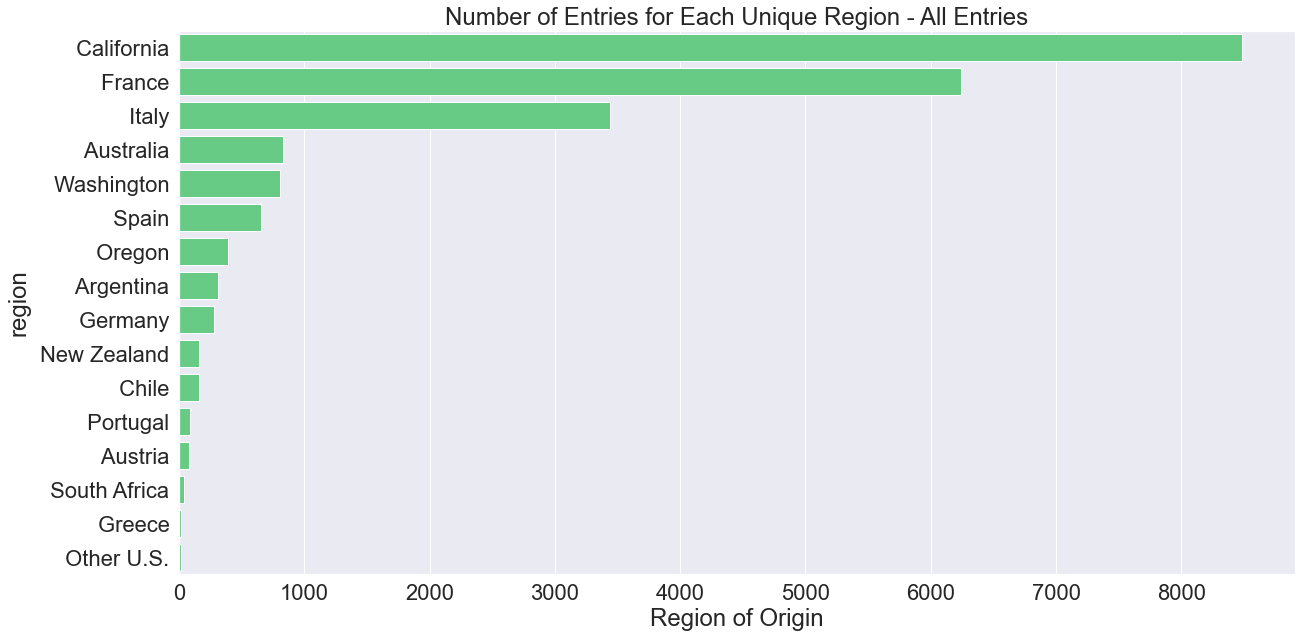

In [111]:
# standard-scaled plot
plt.figure(figsize = [20, 10])
sb.set(font_scale=2)
plt.title('Number of Entries for Each Unique Region - All Entries');
sb.countplot(data= master, y='region', color=green, edgecolor='white', order = master['region'].value_counts().index).set( xlabel = "Region of Origin");

Which region tend to get the highest ratings? Conversly, which region have low ratings?

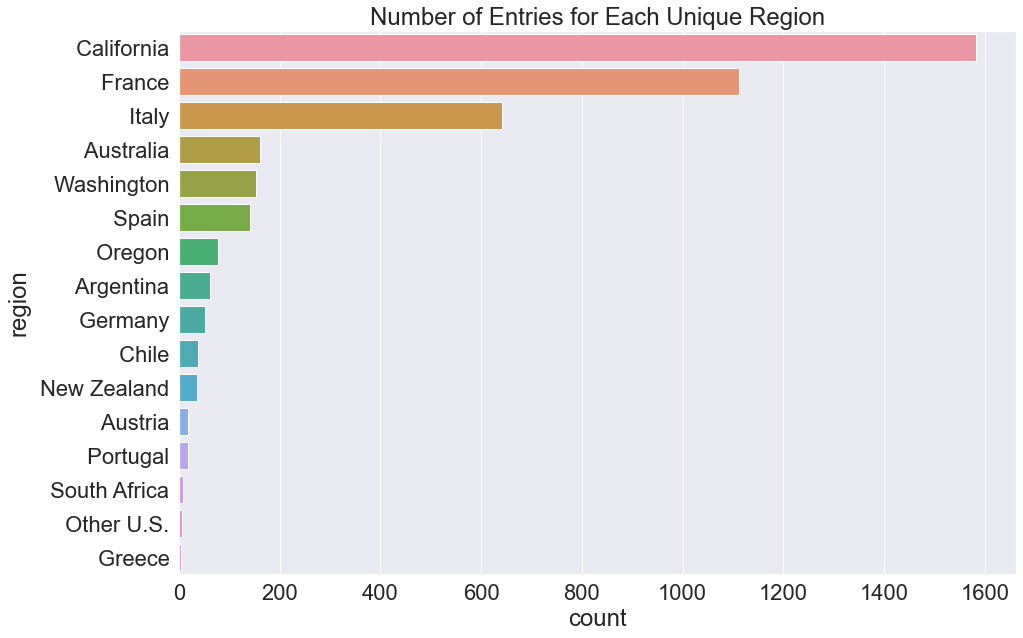

In [75]:
plt.figure(figsize = [15, 10])
sb.set(font_scale=2)
plt.title('Number of Entries for Each Unique Region');
sb.set_palette('husl', 9)
sb.countplot(data=ratings, y='region', order = ratings['region'].value_counts().index);

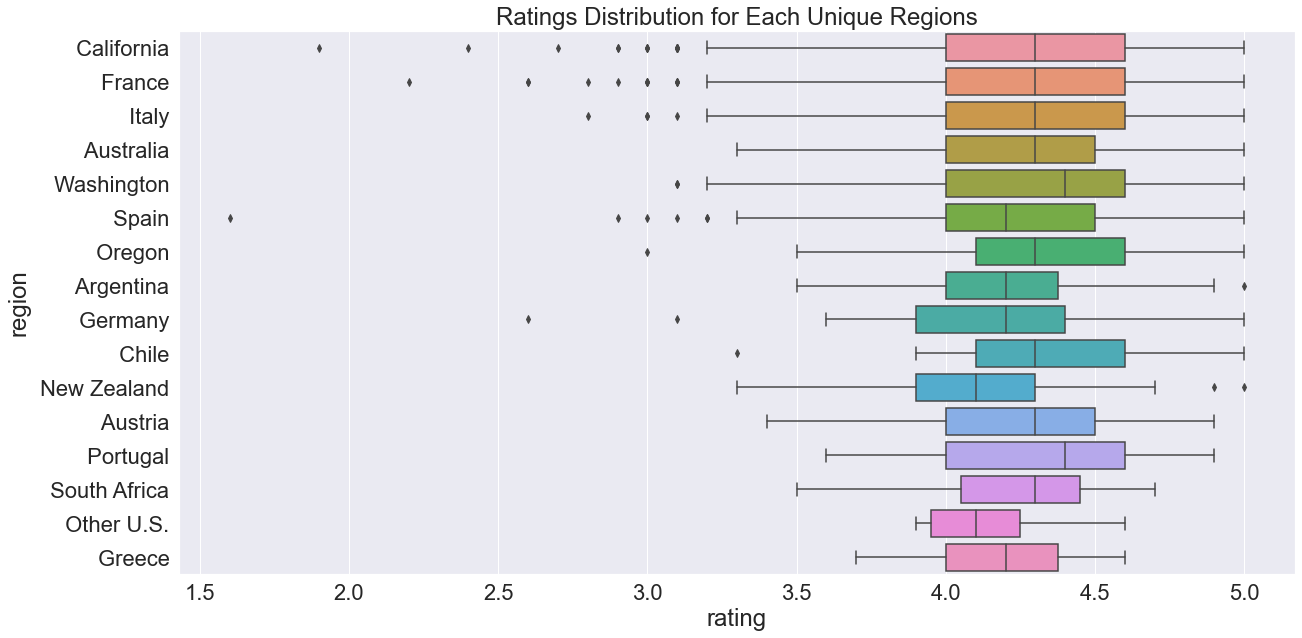

In [104]:
# Box Plot
plt.figure(figsize = [20, 10])
sb.set(font_scale=2)
plt.title('Ratings Distribution for Each Unique Regions');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, x='rating', y='region', order = ratings['region'].value_counts().index);

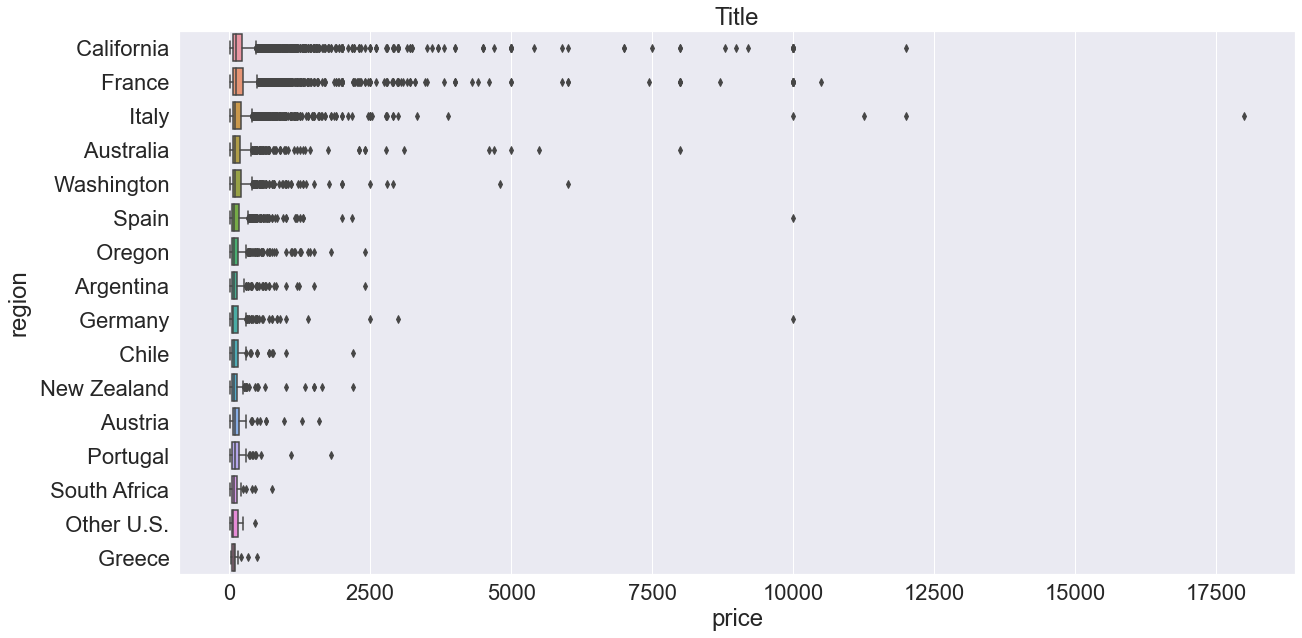

In [77]:
# Box Plot
plt.figure(figsize = [20, 10])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=master, x='price', y='region', order = ratings['region'].value_counts().index);

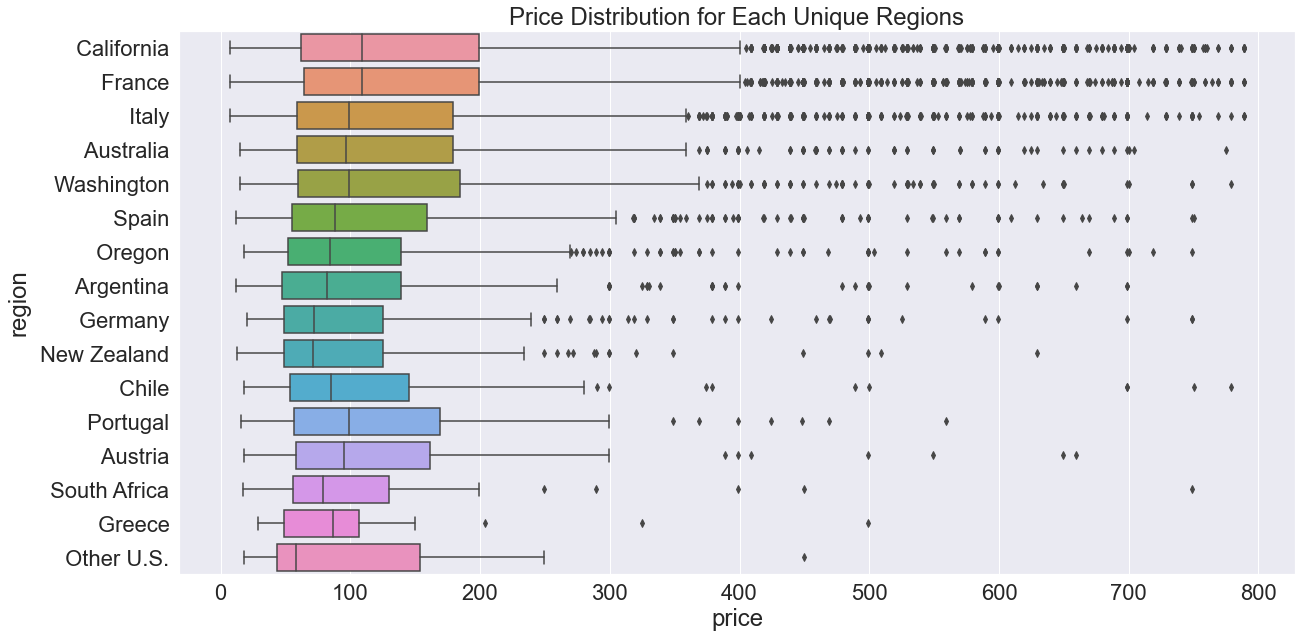

In [86]:
#Box Plot
plt.figure(figsize = [20, 10])
sb.set(font_scale=2)
plt.title('Price Distribution for Each Unique Regions');
sb.set_palette('husl', 9)
sb.boxplot(data=prices, x='price', y='region', order = prices['region'].value_counts().index);

### Appellation Exploration

Which appelation tend to get the highest ratings? Conversly, which appellation have low ratings?

In [19]:
app_rate = ratings.groupby('rating')['appellation'].apply(lambda x: x.value_counts().index[0]).reset_index()
app_rate.head(5)

,rating,appellation
0,1.6,['Rioja']
1,1.9,['Napa Valley']
2,2.2,[' Bordeaux']
3,2.4,[' Central Coast']
4,2.6,[' Burgundy']


In [20]:
app_rate.tail(5)

,rating,appellation
24,4.6,[' Bordeaux']
25,4.7,[' Bordeaux']
26,4.8,['Napa Valley']
27,4.9,[' Napa Valley']
28,5.0,['Napa Valley']


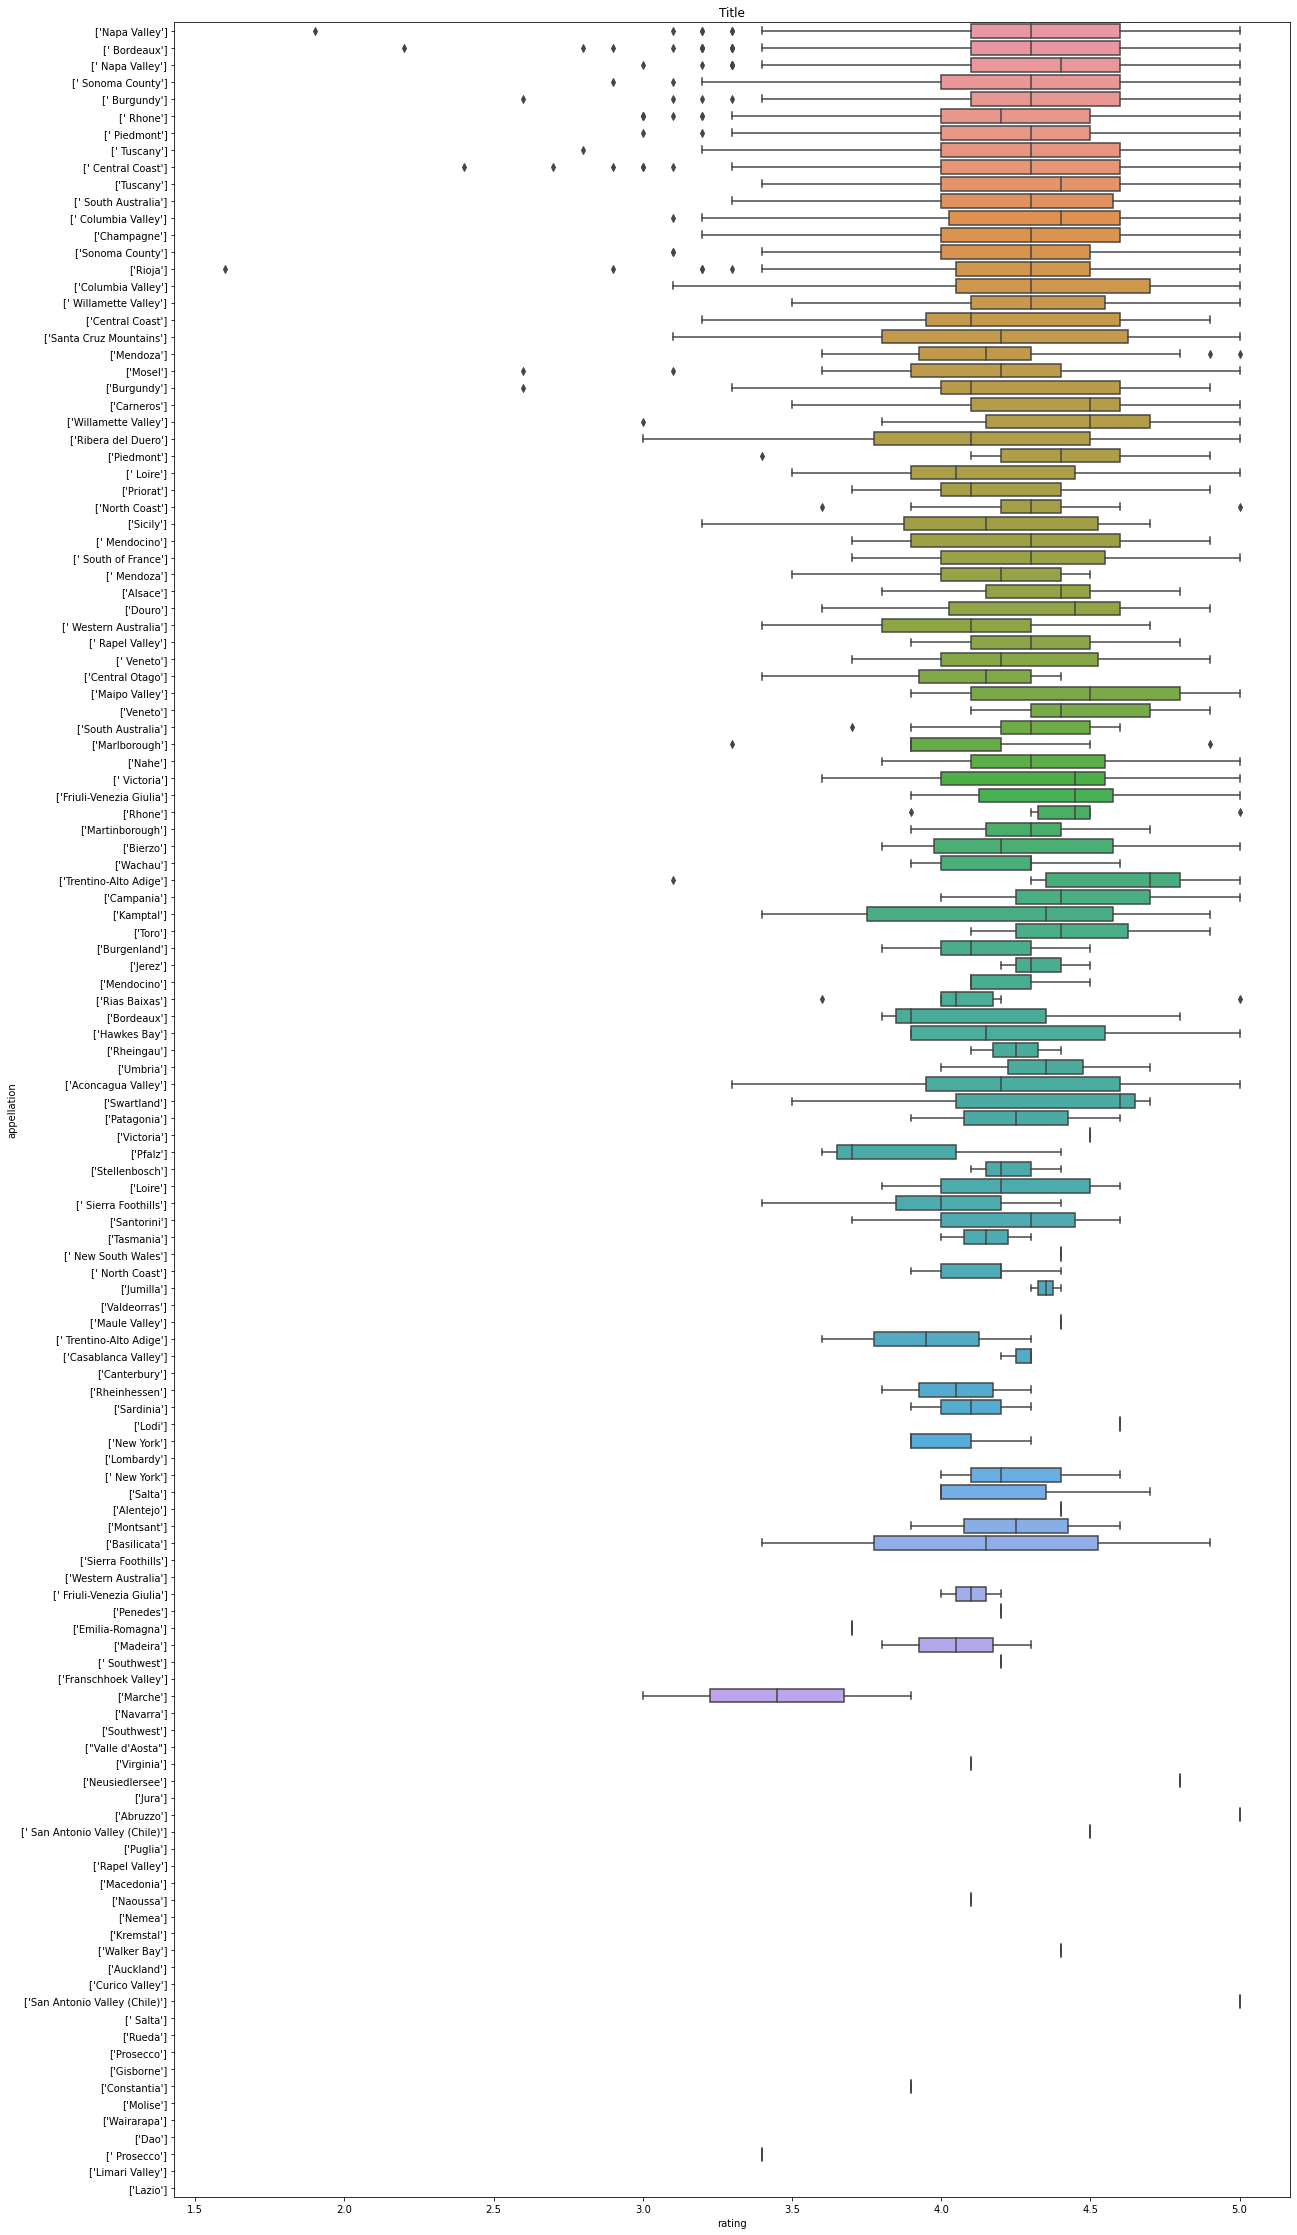

In [21]:
# Box Plot
plt.figure(figsize = [20, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, y='appellation', x='rating', order = ratings['appellation'].value_counts().index);

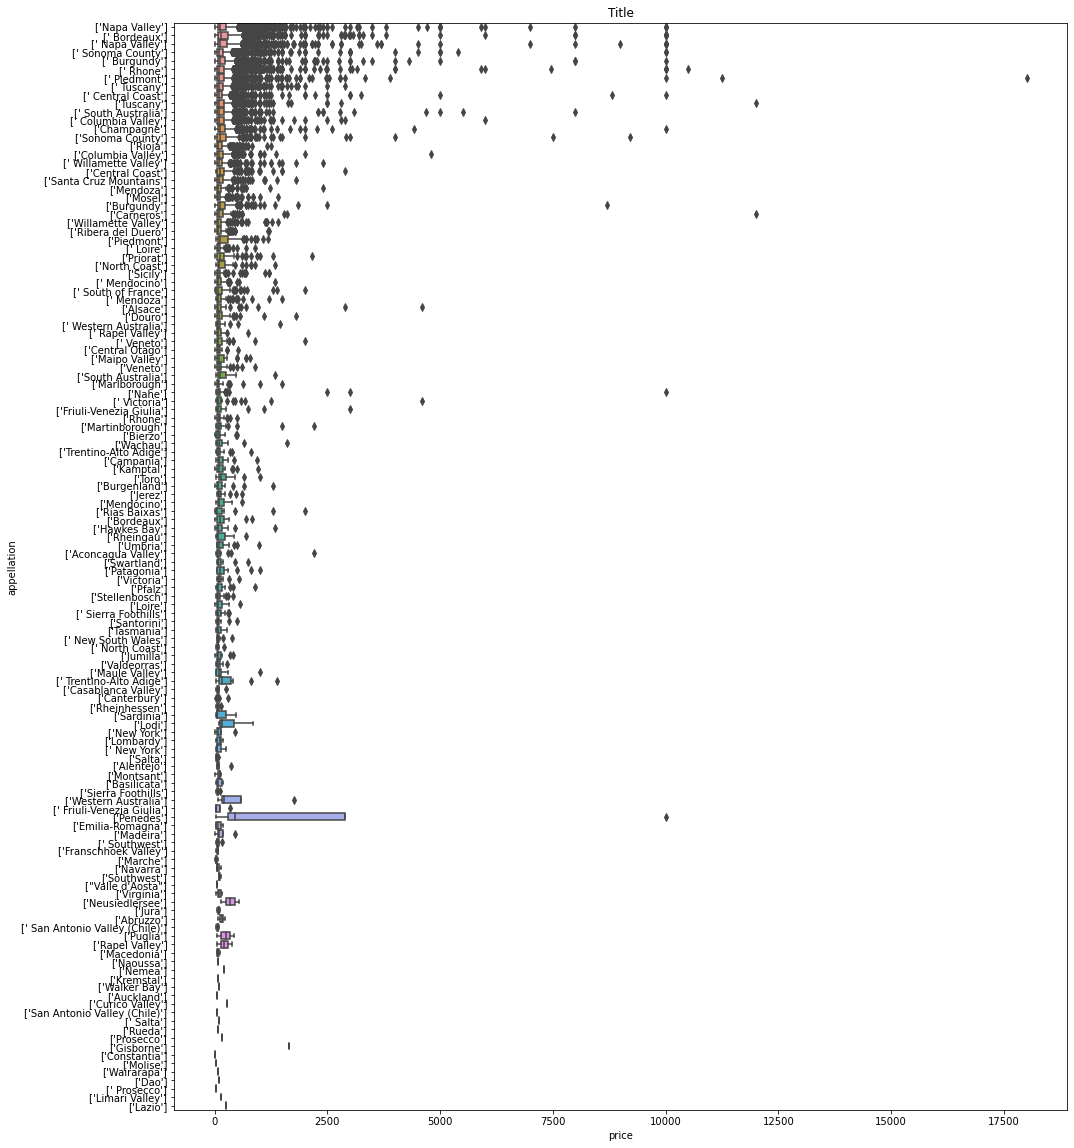

In [44]:
# Box Plot
plt.figure(figsize = [16, 20])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=master, x='price', y='appellation', order = master['appellation'].value_counts().index);

### Varietals Exploration 

Which varietals tend to get the highest ratings? Conversly, which varietals have low ratings?

In [101]:
var_rate = varietals.groupby('rating')['varietal'].apply(lambda x: x.value_counts().index[0]).reset_index()
var_rate.sort_values(by='rating', ascending= False).head(10)

,rating,varietal
29,5.0,Pinot Noir
28,4.9,Cabernet Sauvignon
27,4.8,Bordeaux Red Blends
26,4.7,Bordeaux Red Blends
25,4.6,Cabernet Sauvignon
24,4.5,Cabernet Sauvignon
23,4.4,Cabernet Sauvignon
22,4.3,Cabernet Sauvignon
21,4.2,Bordeaux Red Blends
20,4.1,Bordeaux Red Blends


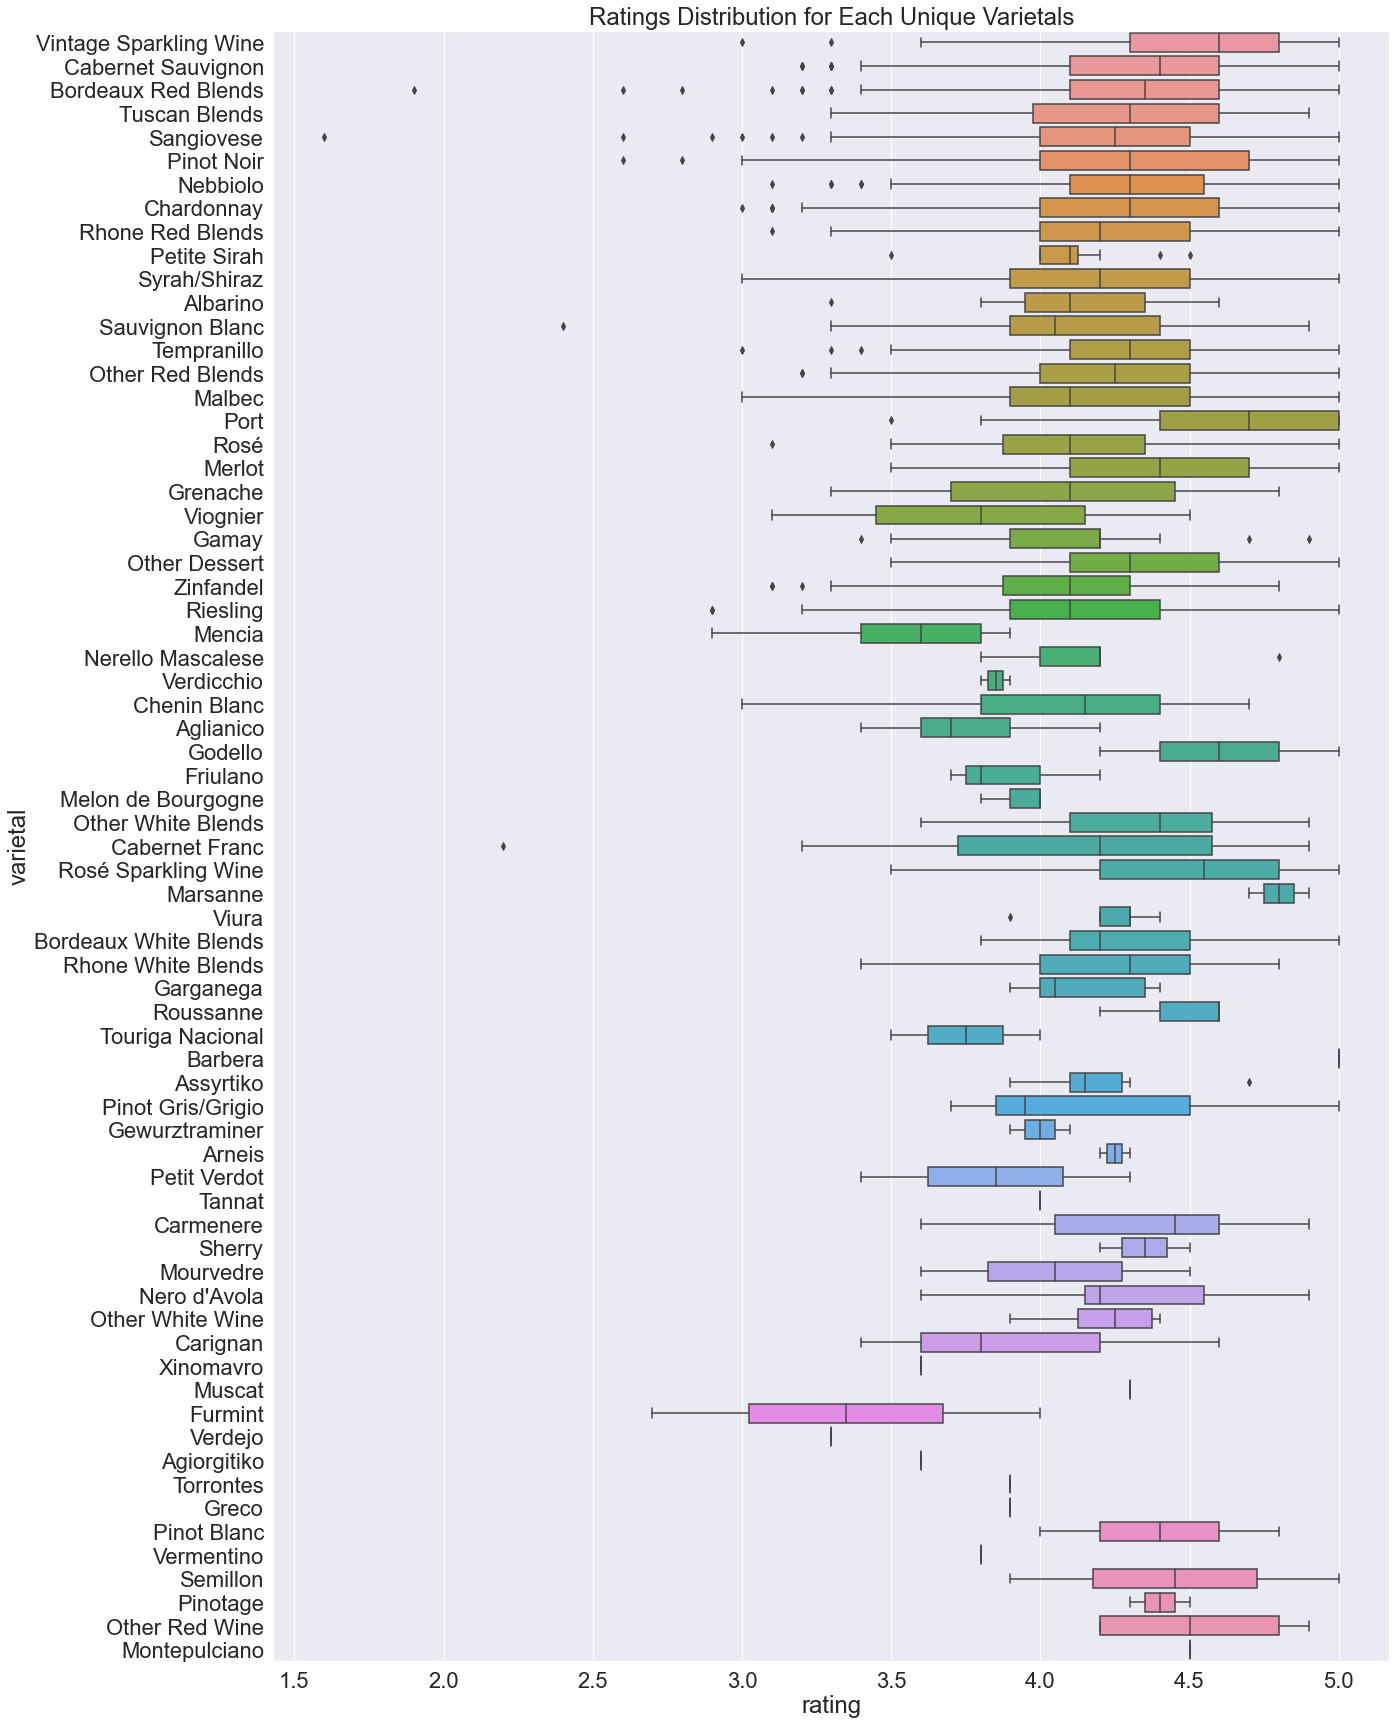

In [113]:
# Box Plot
plt.figure(figsize = [20, 30])
sb.set(font_scale=2)
plt.title('Ratings Distribution for Each Unique Varietals');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, y='varietal', x='rating');
plt.savefig('Ratings Distribution for Each Unique Varietals.png')

Which varietal is the highest rated varietal for each region?

In [25]:
reg_var = varietals.groupby('region')['varietal'].apply(lambda x: x.value_counts().index[0]).reset_index()
reg_var

,region,varietal
0,Argentina,Pinot Noir
1,Australia,Bordeaux Red Blends
2,Austria,Bordeaux Red Blends
3,California,Bordeaux Red Blends
4,Chile,Bordeaux Red Blends
5,France,Bordeaux Red Blends
6,Germany,Pinot Noir
7,Greece,Pinot Noir
8,Italy,Cabernet Sauvignon
9,New Zealand,Pinot Noir


Which region is most common for each varietal?

In [26]:
varietals.groupby('varietal')['region'].apply(lambda x: x.value_counts().index[0]).reset_index()

,varietal,region
0,Agiorgitiko,New Zealand
1,Aglianico,California
2,Albarino,California
3,Alicante Bouschet,Spain
4,Arneis,California
...,...,...
77,Vermentino,France
78,Viognier,California
79,Viura,France
80,Xinomavro,Oregon


What is the ratings spread for each varietal?

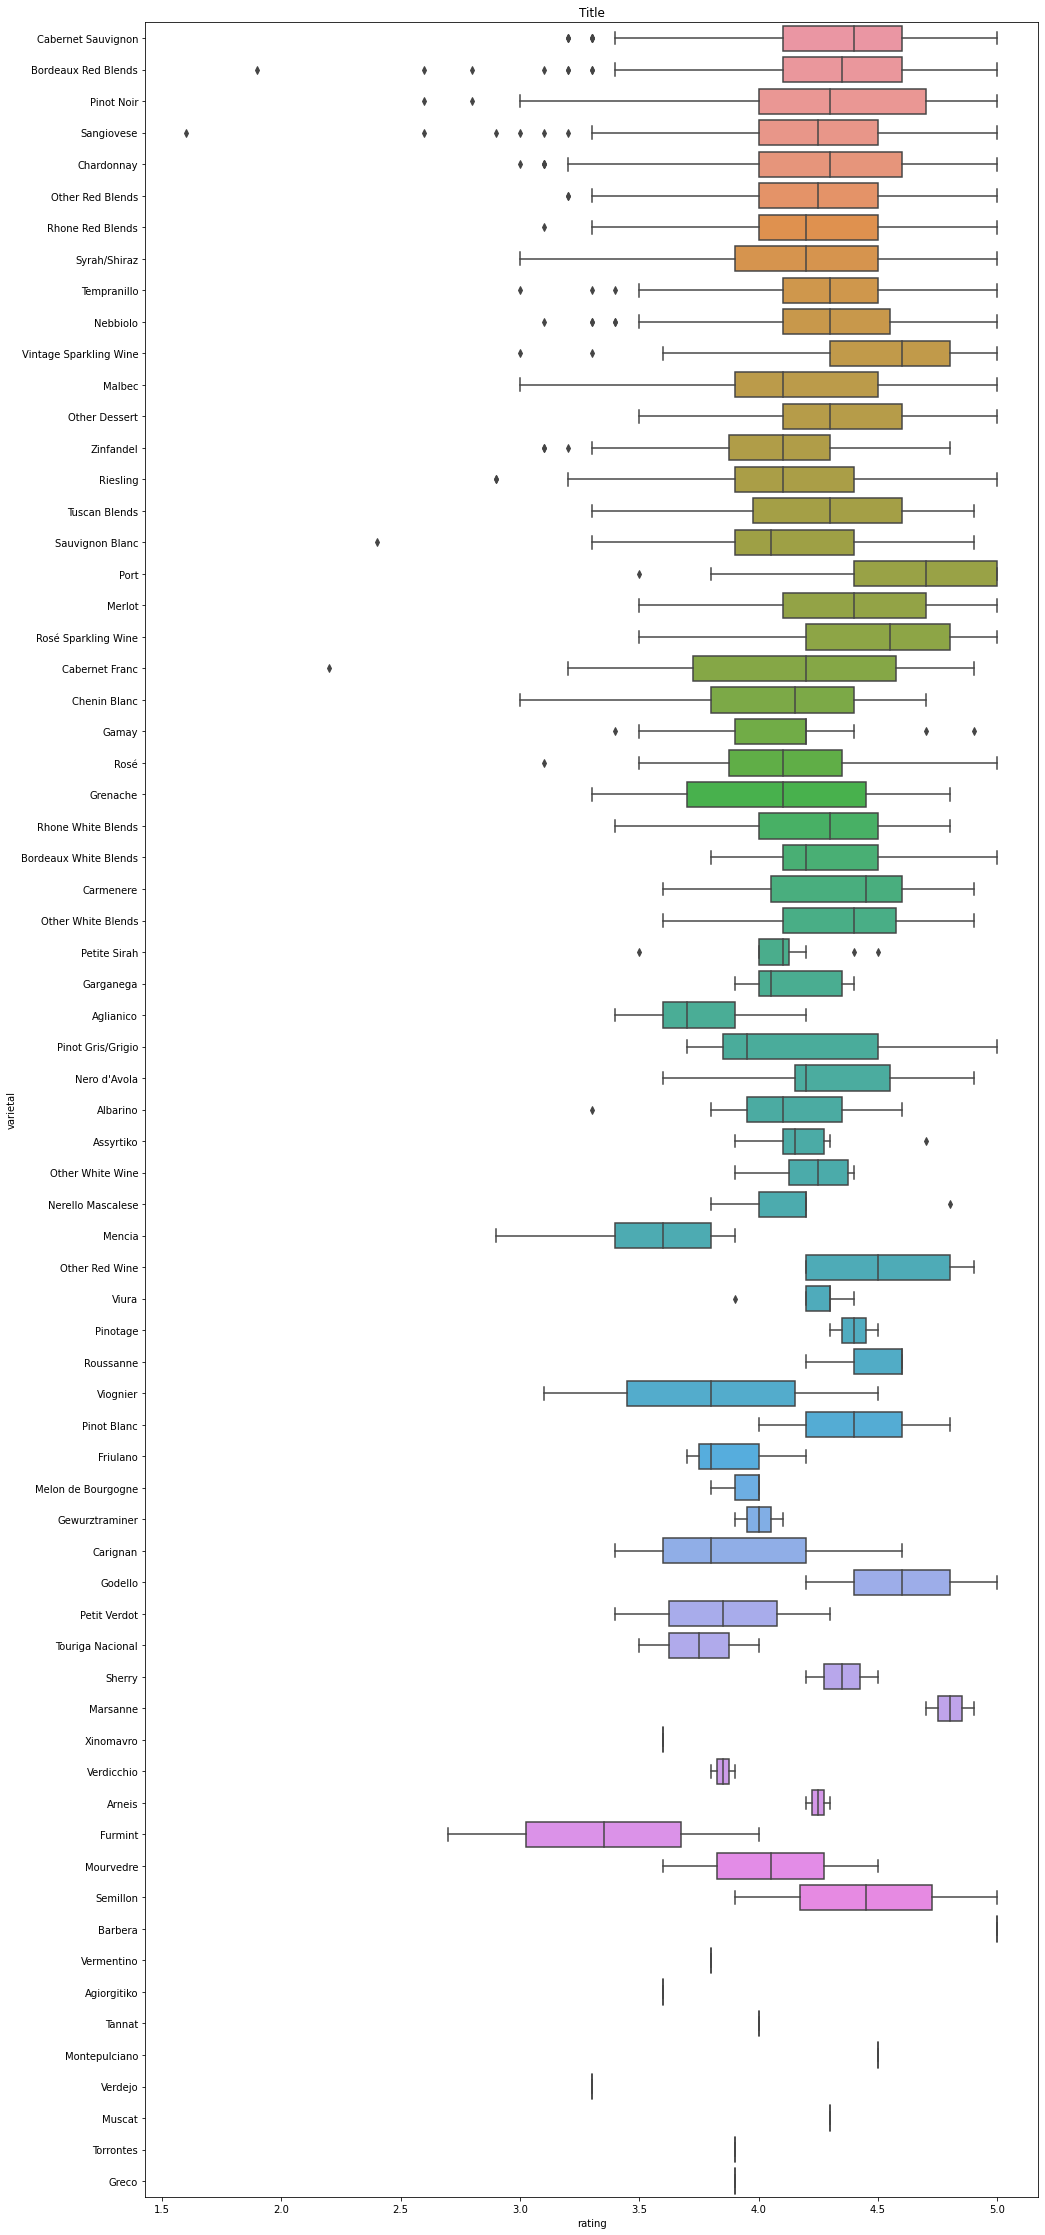

In [43]:
# Box Plot
plt.figure(figsize = [16, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, y='varietal', x='rating', order = ratings['varietal'].value_counts().index);
plt.savefig('Ratings Distribution for Each Unique Varietals.png')

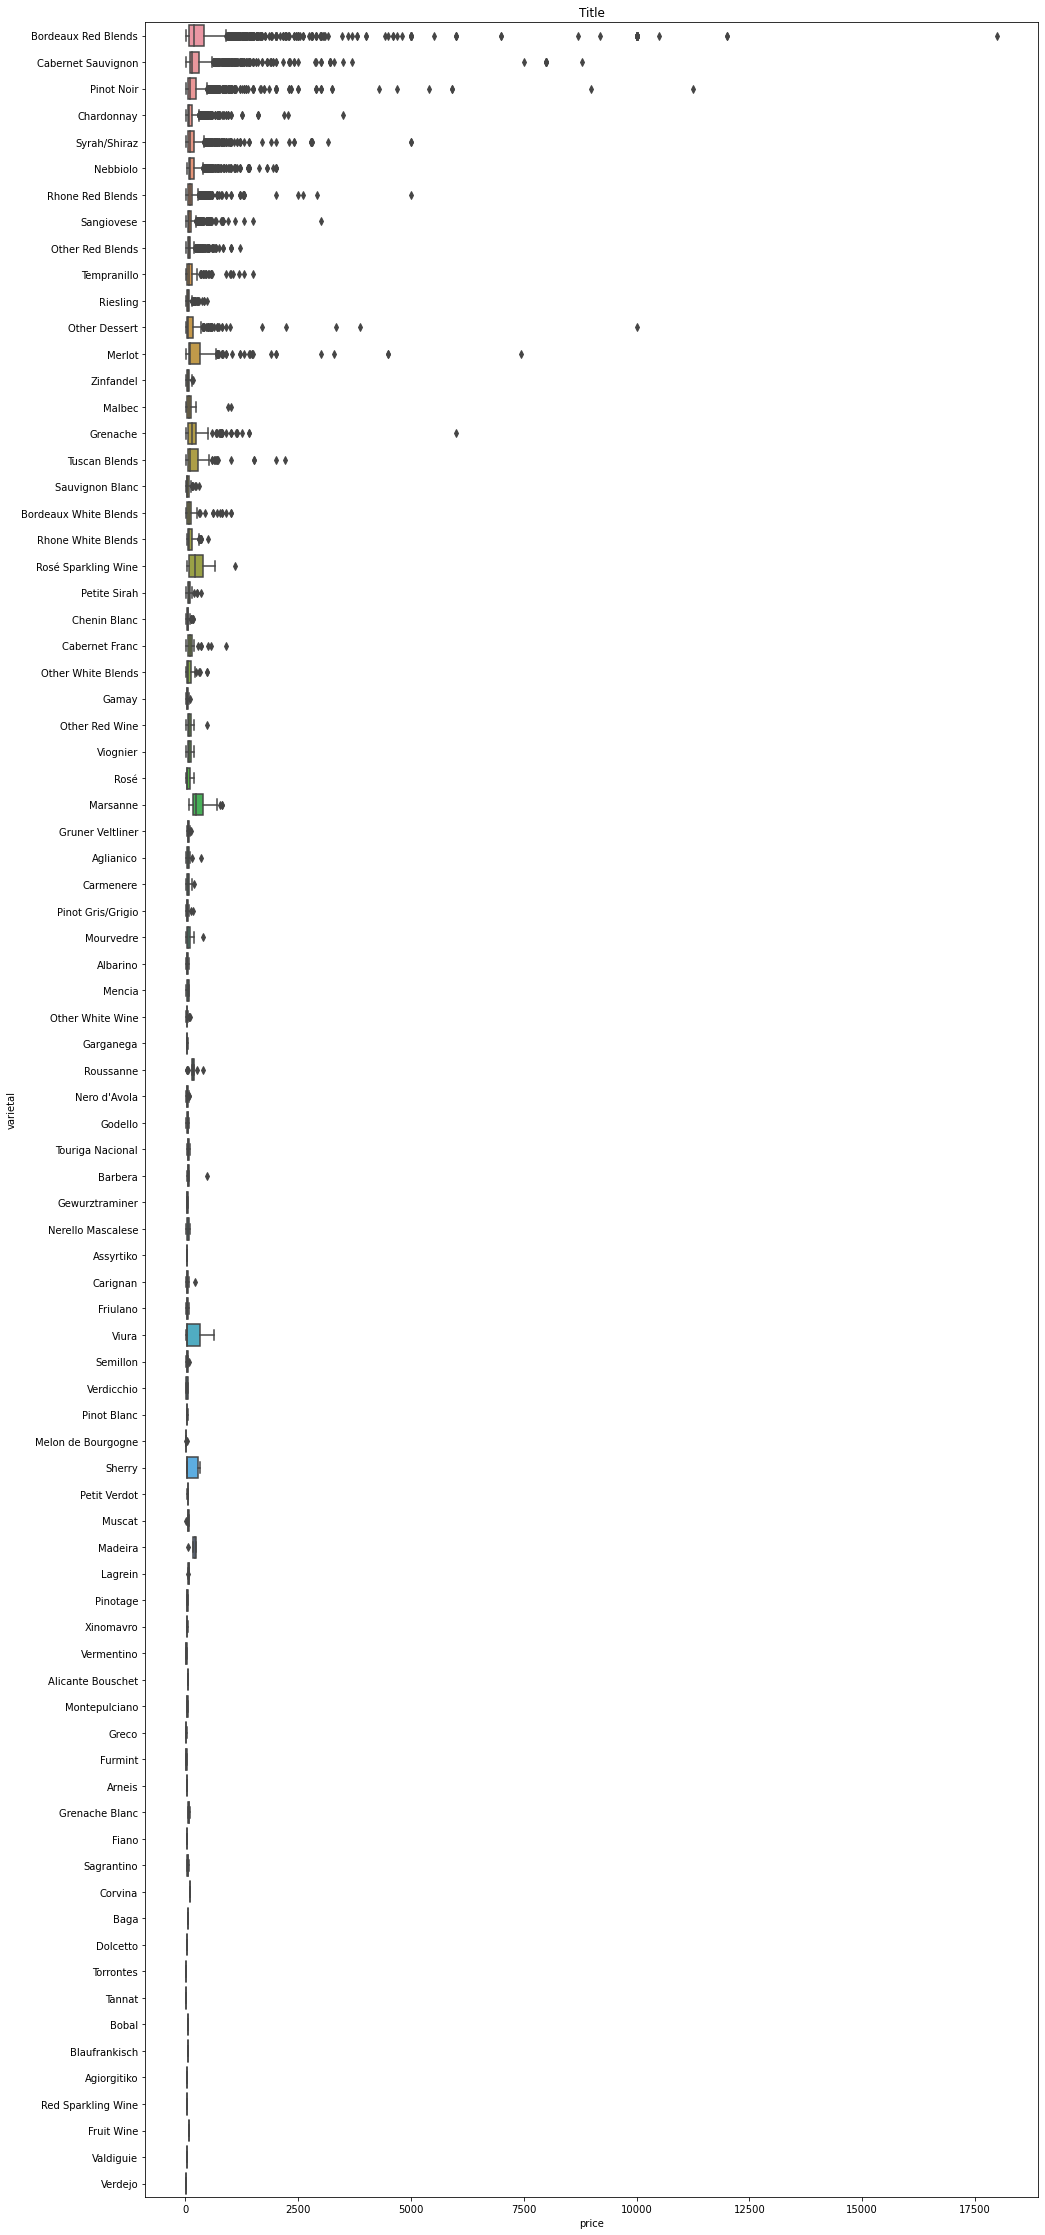

In [33]:
# Box Plot
plt.figure(figsize = [16, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=varietals, y='varietal', x='price', order = varietals['varietal'].value_counts().index);

## Deep dive into California wines

In [50]:
# make dataframe with california wines that have at least one rating count
california_ratings = california[california['rating_count'] > 0] 

In [51]:
california_ratings.head(2)

,product_name,price,varietal,rating,rating_count,appellation,region,year
0,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,4.3,62,['Napa Valley'],California,2017
1,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,4.6,108,['Napa Valley'],California,2016


How does year affect the ratings of the wine? Are there years to stay away from?

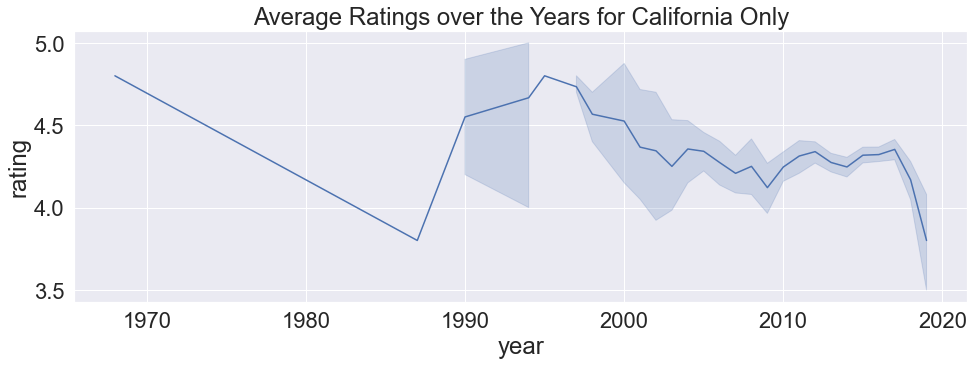

In [116]:
plt.figure(figsize = [16, 5])
plt.title('Average Ratings over the Years for California Only');
sb.set(font_scale=2)
sb.lineplot(data=california_ratings, x="year", y="rating");
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval

Which appelation wines have the highest ratings?

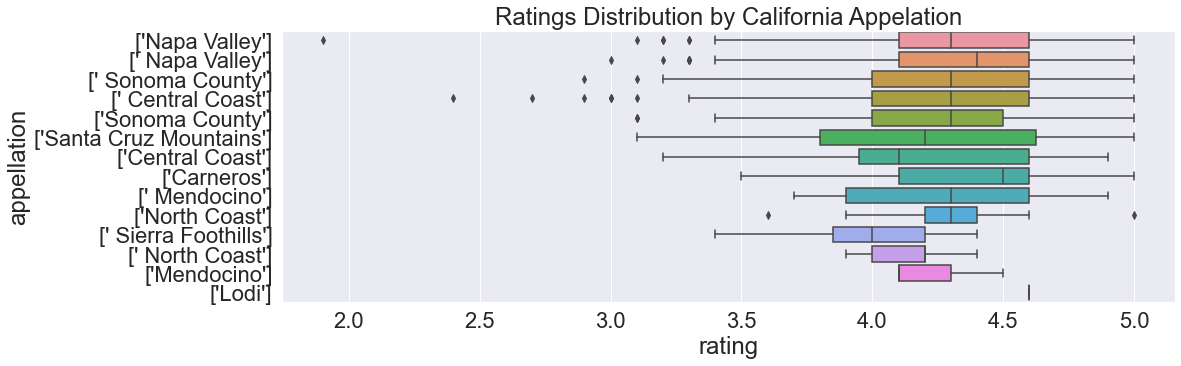

In [114]:
# Box Plot
plt.figure(figsize = [16, 5])
plt.title('Ratings Distribution by California Appelation');
sb.set(font_scale=2)
sb.set_palette('husl', 9)
sb.boxplot(data=california_ratings, y='appellation', x='rating', order = california_ratings['appellation'].value_counts().index);

How does price affect the ratings of the wine?

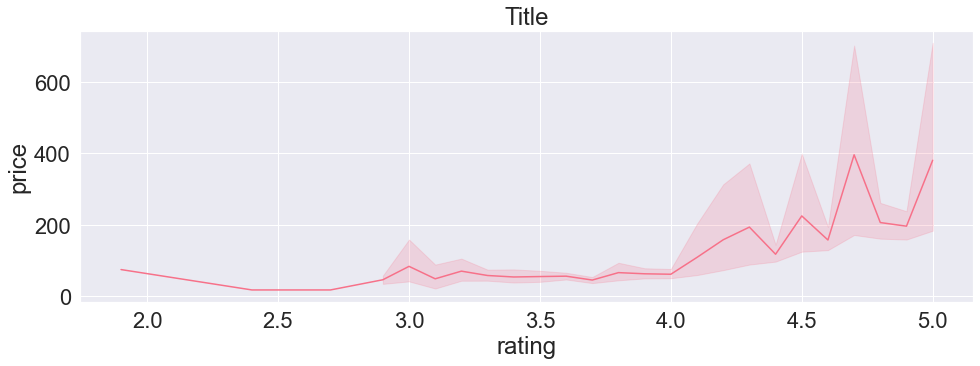

In [102]:
plt.figure(figsize = [16, 5])
plt.title('Title');
sb.set_palette('husl', 9)
sb.lineplot(data=california_ratings, y="price", x="rating");
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year) to show the mean and 95% confidence interval